In [31]:
import numpy
import scipy
import tensorflow as tf
import os
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import scipy.misc

%matplotlib inline

In [5]:
def load_cifar():
    (X_train, y_train), (X_test, y_test) = cifar10.load_data()
    
    y_train_vector = numpy.zeros((len(y_train),10))
    y_test_vector = numpy.zeros((len(y_test),10))
    
    for i in range(len(y_train)):
        y_train_vector[i,y_train[i]] = 1
    for i in range(len(y_test)):
        y_test_vector[i,y_test[i]] = 1
        
    return (X_train, y_train_vector), (X_test,y_test_vector)

def next_batch(step, batch_size, data_values, data_labels):
    """Gets the training and testing data in the right format"""
    return data_values[batch_size*(step-1):batch_size*(step),:,:,:], data_labels[batch_size*(step-1):batch_size*(step),:]

In [63]:
(X_train, y_train), (X_test, y_test) = load_cifar()

In [22]:
X_train = X_train[:5000]
y_train = y_train[:5000]

In [41]:
# Parameters
learning_rate = 0.001
epochs = 20
batch_size = 128
display_step = 10

# Network Parameters
n_input = 32 # MNIST data input (img shape: 28*28)
n_classes = 10 # MNIST total classes (0-9 digits)

# tf Graph input
x_input = tf.placeholder(tf.float32, [None, 32, 32, 3], name="x_input")
y = tf.placeholder(tf.float32, [None, n_classes], name="y")

# Create some wrappers for simplicity
def conv2d(x, W, b, strides=1):
    # Conv2D wrapper, with bias and relu activation
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)


def maxpool2d(x, k=2):
    # MaxPool2D wrapper
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1],
                          padding='SAME')


# Create model
def conv_net(x, weights, biases):
    # Reshape input picture
    x = tf.reshape(x, shape=[-1, 32, 32, 3])

    # Convolution Layer
    conv1 = conv2d(x, weights['wc1'], biases['bc1'])
    # Max Pooling (down-sampling)
    conv1 = maxpool2d(conv1, k=2)

    # Convolution Layer
    conv2 = conv2d(conv1, weights['wc2'], biases['bc2'])
    # Max Pooling (down-sampling)
    conv2 = maxpool2d(conv2, k=2)

    # Fully connected layer
    # Reshape conv2 output to fit fully connected layer input
    fc1 = tf.reshape(conv2, [-1, weights['wd1'].get_shape().as_list()[0]])
    fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
    fc1 = tf.nn.relu(fc1)

    # Output, class prediction
    out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
    return out


# Store layers weight & bias
weights = {
    # 5x5 conv, 1 input, 32 outputs
    'wc1': tf.Variable(tf.random_normal([5, 5, 3, 32])),
    # 5x5 conv, 32 inputs, 64 outputs
    'wc2': tf.Variable(tf.random_normal([5, 5, 32, 64])),
    # fully connected, 7*7*64 inputs, 1024 outputs
    'wd1': tf.Variable(tf.random_normal([4096, 1024])),
    # 1024 inputs, 10 outputs (class prediction)
    'out': tf.Variable(tf.random_normal([1024, n_classes]))
}

biases = {
    'bc1': tf.Variable(tf.random_normal([32])),
    'bc2': tf.Variable(tf.random_normal([64])),
    'bd1': tf.Variable(tf.random_normal([1024])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

# Construct model
pred = conv_net(x_input, weights, biases)

# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# Evaluate model
correct_pred = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# Initializing the variables
init = tf.global_variables_initializer()

# Add ops to save and restore all the variables.
saver = tf.train.Saver()


In [ ]:
# Launch the graph
with tf.Session() as sess:
    # Restore variables from disk.
    saver.restore(sess, "/tmp/model.ckpt")
    sess.run(init)
    batch_step = 1
    epoch = 0
    
    # Keep training until reach max iterations
    while epoch < epochs:
        while batch_step * batch_size < numpy.shape(X_train)[0]:
            batch_x, batch_y = next_batch(batch_step, batch_size, X_train, y_train)
            # Run optimization op (backprop)
            sess.run(optimizer, feed_dict={x_input: batch_x, y: batch_y})
            batch_step += 1
            if batch_step % 10 == 0:
                print ("batch_step" + str(batch_step))
        
        loss, acc = sess.run([cost, accuracy], feed_dict={x_input: X_train,
                                                              y: y_train})
            
        print("Epoch " + str(epoch) + ", Loss= " + \
              "{:.6f}".format(loss) + ", Training Accuracy= " + \
              "{:.5f}".format(acc))
        
        # Save the variables to disk.
        save_path = saver.save(sess, "/tmp/model.ckpt")
        print("Model saved in file: %s" % save_path)
        
        batch_step = 1
        epoch += 1
    print("Optimization Finished!")

batch_step10
batch_step20
batch_step30
batch_step40
batch_step50
batch_step60
batch_step70
batch_step80
batch_step90
batch_step100
batch_step110
batch_step120
batch_step130
batch_step140
batch_step150
batch_step160
batch_step170
batch_step180
batch_step190
batch_step200
batch_step210
batch_step220
batch_step230
batch_step240
batch_step250
batch_step260
batch_step270
batch_step280
batch_step290
batch_step300
batch_step310
batch_step320
batch_step330
batch_step340
batch_step350
batch_step360
batch_step370
batch_step380
batch_step390


In [44]:
# Add a placeholder variable for the target class-number
pl_cls_target = tf.placeholder(tf.int32, name="target_class")

# Add a new loss-function. This is the cross-entropy.
# See Tutorial #01 for an explanation of cross-entropy.
loss = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=pred, labels=[pl_cls_target])
# Get the gradient for the loss-function with regard to
# the resized input image.
gradient = tf.gradients(loss, x_input)

Model restored.
Generating Adversarial Example
Iteration: 0
Source score: 100.00%, class-number:    1, class-name: automobile
Target score:   0.00%, class-number:    9, class-name: truck
Gradient min: -18114.636719, max: 19910.710938, stepsize:  0.000010

Iteration: 1
Source score: 100.00%, class-number:    1, class-name: automobile
Target score:   0.00%, class-number:    9, class-name: truck
Gradient min: -18108.218750, max: 19925.519531, stepsize:  0.000010

Iteration: 2
Source score: 100.00%, class-number:    1, class-name: automobile
Target score:   0.00%, class-number:    9, class-name: truck
Gradient min: -18042.779297, max: 21945.474609, stepsize:  0.000010

Iteration: 3
Source score: 100.00%, class-number:    1, class-name: automobile
Target score:   0.00%, class-number:    9, class-name: truck
Gradient min: -17986.810547, max: 19711.365234, stepsize:  0.000010

Iteration: 4
Source score: 100.00%, class-number:    1, class-name: automobile
Target score:   0.00%, class-number:  

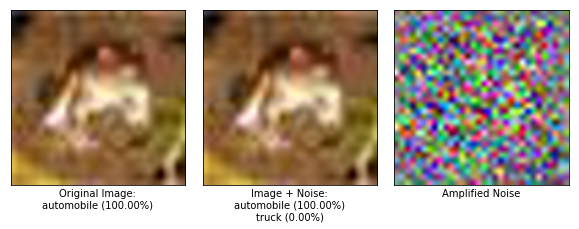

Noise min: -3.000, max: 3.000, mean: -0.023, std: 1.363


In [61]:
# Launch the graph
with tf.Session() as sess:
    # Restore variables from disk.
    saver.restore(sess, "/tmp/model.ckpt")
    print("Model restored.")
    sess.run(init)
    
    print("Generating Adversarial Example")
    adversary_example(sess,
                      pred,
                      gradient,
                      image_path="/Users/patrickhayes/Desktop/cifar.jpg",
                      cls_target=9,
                      noise_limit=3.0,
                      required_score=0.75)
    

In [10]:
cifar10_string_to_int = {"airplane": 0, "automobile": 1, "bird": 2, "cat": 3, "deer": 4, "dog": 5, "frog": 6,
                            "horse": 7, "ship": 8, "truck": 9}
cifar10_int_to_string = {0:"airplane", 1:"automobile", 2:"bird", 3:"cat", 4:"deer", 5:"dog", 6:"frog",
                            7:"horse", 8:"ship", 9:"truck"}

In [56]:
def find_adversary_noise(session, pred, gradient, image_path, cls_target, noise_limit=3.0,
                         required_score=0.99, max_iterations=30):
    """
    Find the noise that must be added to the given image so
    that it is classified as the target-class.
    
    image_path: File-path to the input-image (must be *.jpg).
    cls_target: Target class-number (integer between 1-1000).
    noise_limit: Limit for pixel-values in the noise.
    required_score: Stop when target-class score reaches this.
    max_iterations: Max number of optimization iterations to perform.
    """
    # Read the jpeg-image as a numpy array.
    image = scipy.misc.imresize(mpimg.imread(image_path), (32,32,3))
    image = numpy.array([image])
    # Run the output through a softmax
    pred = tf.nn.softmax(pred)
    
    # Use TensorFlow to calculate the predicted class-scores
    # (aka. probabilities) as well as the resized image.
    predicted = session.run(pred, feed_dict = {x_input: image}, )
    
    # Convert to one-dimensional array.
    predicted = numpy.squeeze(predicted)

    # Predicted class-number.
    cls_source = numpy.argmax(predicted)

    # Score for the predicted class (aka. probability or confidence).
    score_source_org = predicted.max()
    
    # Names for the source and target classes.
    name_source = cifar10_int_to_string[cls_source]
    name_target = cifar10_int_to_string[cls_target]
    
    #convert the target class into one-hot encoding
    cls_target_vector = numpy.zeros((1,10))
    cls_target_vector[0,cls_target] = 1
    
    # Initialize the noise to zero.
    noise = 0
    
    # Perform a number of optimization iterations to find
    # the noise that causes mis-classification of the input image.
    for i in range(max_iterations):
        print("Iteration:", i)

        # The noisy image is just the sum of the input image and noise.
        noisy_image = image + noise

        # Ensure the pixel-values of the noisy image are between
        # 0 and 255 like a real image. If we allowed pixel-values
        # outside this range then maybe the mis-classification would
        # be due to this 'illegal' input breaking the Inception model.
        noisy_image = numpy.clip(a=noisy_image, a_min=0.0, a_max=255.0)

        # Create a feed-dict. This feeds the noisy image to the
        # tensor in the graph that holds the resized image, because
        # this is the final stage for inputting raw image data.
        # This also feeds the target class-number that we desire.
        
        feed_dict = {x_input: noisy_image,
                     pl_cls_target: cls_target}

        # Calculate the predicted class-scores as well as the gradient.
        pred_noise, grad = session.run([pred, gradient],
                                 feed_dict=feed_dict)
        
        # Convert the predicted class-scores to a one-dim array.
        pred_noise = numpy.squeeze(pred_noise)

        # The scores (probabilities) for the source and target classes.
        score_source = pred_noise[cls_source]
        score_target = pred_noise[cls_target]

        # Squeeze the dimensionality for the gradient-array.
        grad = numpy.array(grad).squeeze()

        # The gradient now tells us how much we need to change the
        # noisy input image in order to move the predicted class
        # closer to the desired target-class.

        # Calculate the max of the absolute gradient values.
        # This is used to calculate the step-size.
        grad_absmax = numpy.abs(grad).max()
        
        # If the gradient is very small then use a lower limit,
        # because we will use it as a divisor.
        if grad_absmax < 1e-10:
            grad_absmax = 1e-10

        # Calculate the step-size for updating the image-noise.
        # This ensures that at least one pixel colour is changed by 7.
        # Recall that pixel colours can have 255 different values.
        # This step-size was found to give fast convergence.
        step_size = 0.00001
        
        # Print the score etc. for the source-class.
        msg = "Source score: {0:>7.2%}, class-number: {1:>4}, class-name: {2}"
        print(msg.format(score_source, cls_source, name_source))

        # Print the score etc. for the target-class.
        msg = "Target score: {0:>7.2%}, class-number: {1:>4}, class-name: {2}"
        print(msg.format(score_target, cls_target, name_target))

        # Print statistics for the gradient.
        msg = "Gradient min: {0:>9.6f}, max: {1:>9.6f}, stepsize: {2:>9.6f}"
        print(msg.format(grad.min(), grad.max(), step_size))

        # Newline.
        print()

        # If the score for the target-class is not high enough.
        if score_target < required_score:
            # Update the image-noise by subtracting the gradient
            # scaled by the step-size.
            noise -= step_size * grad

            # Ensure the noise is within the desired range.
            # This avoids distorting the image too much.
            noise = numpy.clip(a=noise,
                            a_min=-noise_limit,
                            a_max=noise_limit)
        else:
            # Abort the optimization because the score is high enough.
            break

    return image.squeeze(), noisy_image.squeeze(), noise, \
           name_source, name_target, \
           score_source, score_source_org, score_target

In [12]:
def normalize_image(x):
    # Get the min and max values for all pixels in the input.
    x_min = x.min()
    x_max = x.max()

    # Normalize so all values are between 0.0 and 1.0
    x_norm = (x - x_min) / (x_max - x_min)

    return x_norm

In [13]:
def plot_images(image, noise, noisy_image,
                name_source, name_target,
                score_source, score_source_org, score_target):
    """
    Plot the image, the noisy image and the noise.
    Also shows the class-names and scores.

    Note that the noise is amplified to use the full range of
    colours, otherwise if the noise is very low it would be
    hard to see.

    image: Original input image.
    noise: Noise that has been added to the image.
    noisy_image: Input image + noise.
    name_source: Name of the source-class.
    name_target: Name of the target-class.
    score_source: Score for the source-class.
    score_source_org: Original score for the source-class.
    score_target: Score for the target-class.
    """
    # Create figure with sub-plots.
    fig, axes = plt.subplots(1, 3, figsize=(10,10))

    # Adjust vertical spacing.
    fig.subplots_adjust(hspace=0.1, wspace=0.1)

    # Use interpolation to smooth pixels?
    smooth = True
    
    # Interpolation type.
    if smooth:
        interpolation = 'spline16'
    else:
        interpolation = 'nearest'

    # Plot the original image.
    # Note that the pixel-values are normalized to the [0.0, 1.0]
    # range by dividing with 255.
    ax = axes.flat[0]
    ax.imshow(image / 255.0, interpolation=interpolation)
    msg = "Original Image:\n{0} ({1:.2%})"
    xlabel = msg.format(name_source, score_source_org)
    ax.set_xlabel(xlabel)

    # Plot the noisy image.
    ax = axes.flat[1]
    ax.imshow(noisy_image / 255.0, interpolation=interpolation)
    msg = "Image + Noise:\n{0} ({1:.2%})\n{2} ({3:.2%})"
    xlabel = msg.format(name_source, score_source, name_target, score_target)
    ax.set_xlabel(xlabel)

    # Plot the noise.
    # The colours are amplified otherwise they would be hard to see.
    ax = axes.flat[2]
    ax.imshow(normalize_image(noise), interpolation=interpolation)
    xlabel = "Amplified Noise"
    ax.set_xlabel(xlabel)

    # Remove ticks from all the plots.
    for ax in axes.flat:
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

In [14]:
def adversary_example(sess, pred, gradient, image_path, cls_target,
                      noise_limit, required_score):
    """
    Find and plot adversarial noise for the given image.
    
    image_path: File-path to the input-image (must be *.jpg).
    cls_target: Target class-number (integer between 1-1000).
    noise_limit: Limit for pixel-values in the noise.
    required_score: Stop when target-class score reaches this.
    """

    # Find the adversarial noise.
    image, noisy_image, noise, \
    name_source, name_target, \
    score_source, score_source_org, score_target = \
        find_adversary_noise(sess, pred, gradient, image_path=image_path,
                             cls_target=cls_target,
                             noise_limit=noise_limit,
                             required_score=required_score)

    # Plot the image and the noise.
    plot_images(image=image, noise=noise, noisy_image=noisy_image,
                name_source=name_source, name_target=name_target,
                score_source=score_source,
                score_source_org=score_source_org,
                score_target=score_target)

    # Print some statistics for the noise.
    msg = "Noise min: {0:.3f}, max: {1:.3f}, mean: {2:.3f}, std: {3:.3f}"
    print(msg.format(noise.min(), noise.max(),
                     noise.mean(), noise.std()))

In [15]:
def imshow(np_image):
    to_show = Image.fromarray(numpy.uint8(scipy.misc.imresize(np_image,(224,224,3))))
    to_show.show()